In [1]:
import pickle
import numpy as np
import pandas as pd
import itertools
from mastml.mastml import Mastml
from mastml.feature_generators import ElementalFeatureGenerator, ElementalFractionGenerator
# from mastml.feature_generators import ElementalFeatureGenerator
import matplotlib.pyplot as plt


In [2]:

pfile_X = "Codes/bandgap_pbe_X.pickle"
pfile_Y = "Codes/bandgap_pbe_Y.pickle"

with open(pfile_X, 'rb') as f:
    data = pickle.load(f)

In [3]:
# for k,v in data.items():
    # print(k)

# n = 74992
# acc = 0
# for id in data['icsd_id']:
#     if not id:
#         acc += 1
# print(data)
# print(acc / n)
# print(list(numpy.unique(data['reference'])))
# print(list(numpy.unique(data['comments'])))
# print(list(numpy.unique(data['bandgap type'])))
# print(list(numpy.unique(data['comp method'])))

x_clean = data[['composition', 'structure', 'space group']]
# print("x_clean", x_clean)

composition = x_clean['composition']
structure = x_clean['structure']

m = float("inf")

# foo = structure[m]
# compositions = [composition[i] for i in range(m)]
compositions = [comp for i, comp in enumerate(composition) if i < m]

# sites = foo['sites']
# print("compositions", compositions)
print("num compositions", len(compositions))

# l = []
# for s in sites:
#     l.append(s['species'])

num compositions 74992


In [4]:
# df = pd.DataFrame([compositions])
df = pd.DataFrame(compositions)
# print("df", df)
# e = ElementalFeatureGenerator(df)
e = ElementalFractionGenerator(df)
e.fit()
x, y = e.transform(fraction=False)
# x, y = e.transform()
print("vector shape", x.shape, "y", y)


vector shape (74992, 118) y None


In [5]:
x

,H,He,Li,Be,B,C,N,O,F,Ne,...,Mt,Ds,Rg,Cn,Nh,Fl,Mc,Lv,Ts,Og
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,8.0,0.0,8.0,0.0,0.0,24.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74988,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Grouping for O
	theshold:	0
	percent in O_group:	0.4545018135267762


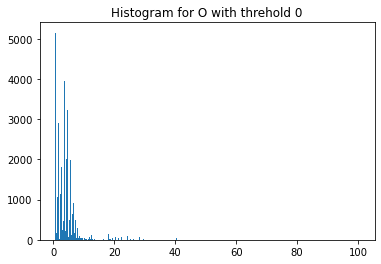

mean 4.780443231854638


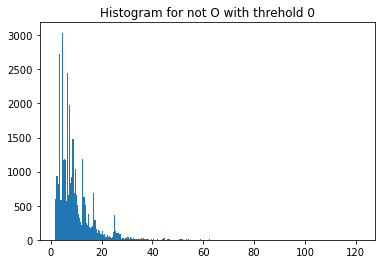

mean 9.167691574438246
Grouping for B
	theshold:	0
	percent in B_group:	0.04636494559419672


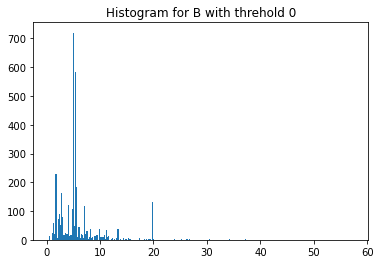

mean 5.972754260594295


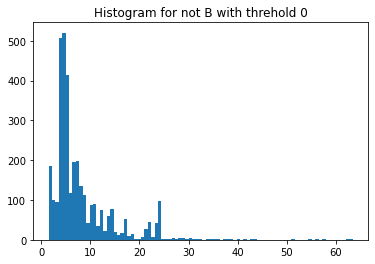

mean 8.10420862993658
Grouping for F
	theshold:	0
	percent in F_group:	0.0855824621292938


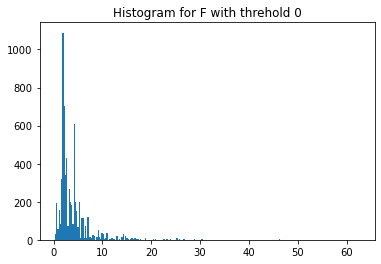

mean 3.949156368023428


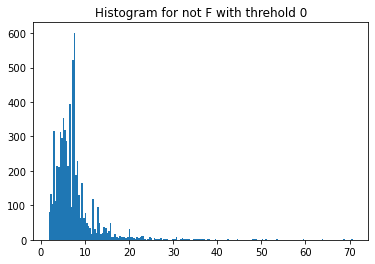

mean 7.4305085074846025
Grouping for Cl
	theshold:	0
	percent in Cl_group:	0.04140441647109025


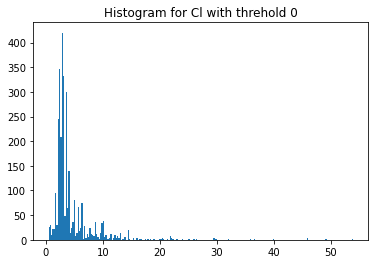

mean 4.329946592188034


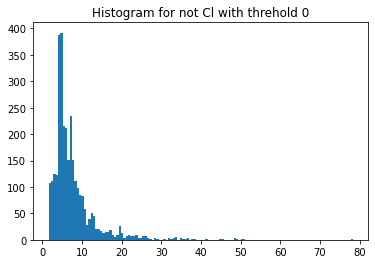

mean 7.573391096675711
Grouping for Br
	theshold:	0
	percent in Br_group:	0.019255387241305738


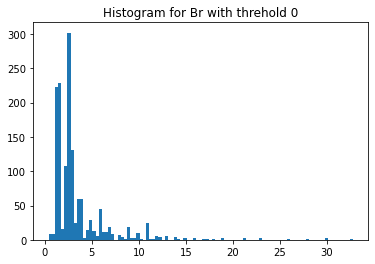

mean 3.4136948189644114


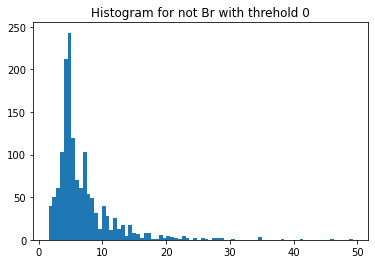

mean 6.808038773632209
Grouping for I
	theshold:	0
	percent in I_group:	0.02126893535310433


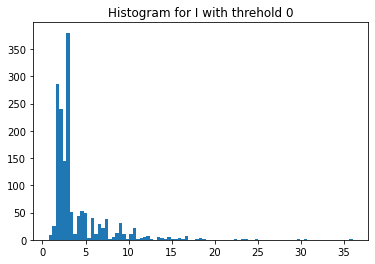

mean 3.910119720486498


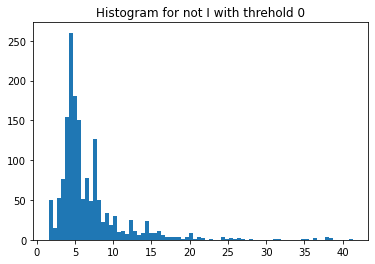

mean 6.760579674354363


In [6]:
# list(x.items())
# print(*x.items(), sep="\n")
# print(x.iloc[0])

## verify rows sum to 1
# total = x.sum(axis=1, numeric_only= True)
# print("total", total)

material_group_char = ["O", "B", "F", "Cl", "Br", "I"]
for mat in material_group_char:
    print("Grouping for", mat)
    st1 = 100
    st2 = 10
    thresholds = [0]
    
    for th in thresholds:
        # Make split
        group = x[x[mat] > th]
        not_group = x[x[mat] <= th]

        perc_in_group = group.shape[0]/x.shape[0]
        print(f"\ttheshold:\t{th}\n\tpercent in {mat}_group:\t{perc_in_group}")
        # if the split leaves an empty group skip
        if perc_in_group == 0:
            continue
        
        # do GPR stuff

In [7]:
## Compute distances